sum of eigenvalues: 9.000000000000004
Explained Variance for PC1: 45.95173978609587
Explained Variance for PC2: 17.181625651618212


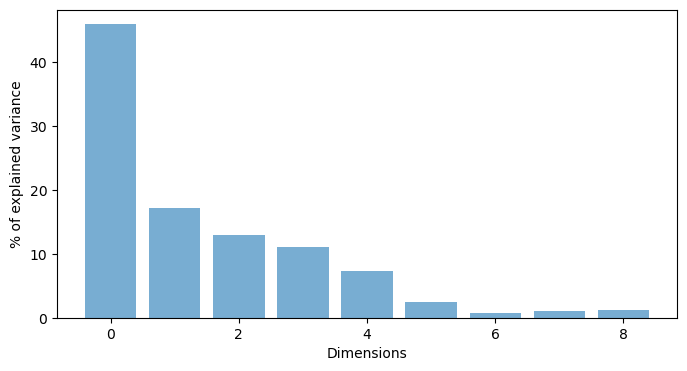

Explained Variance Dimensions: (9,)
Number of Dimensions in Data (X): 9


In [56]:
#plotting in 3D TAKE TWO

import numpy as np
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt

np.random.seed(69)

df= pd.read_csv("Country-data.csv")

country= df["country"].tolist()
X= df.drop("country", axis=1)

X = (X-X.mean()) / X.std(ddof=0)

X_corr = (1/167)* X.T.dot(X)

eig_values, eig_vectors = np.linalg.eig(X_corr)

total_eig = np.sum(eig_values)

print("sum of eigenvalues:", np.sum(eig_values))


explained_variance = (eig_values / np.sum(eig_values)) * 100

print("Explained Variance for PC1:", explained_variance[0])
print("Explained Variance for PC2:", explained_variance[1])

plt.figure(figsize=(8, 4))
plt.bar(range(X.shape[1]), explained_variance, alpha=0.6)  
plt.ylabel("% of explained variance")
plt.xlabel("Dimensions")
plt.show()

print("Explained Variance Dimensions:", explained_variance.shape)
print("Number of Dimensions in Data (X):", X.shape[1])

pc1 = X.dot(eig_vectors[:, 0])
pc2 = X.dot(eig_vectors[:, 1])
pc3 = X.dot(eig_vectors[:, 2])

df = pd.DataFrame({'pc1': pc1, 'pc2': pc2, 'pc3': pc3, 'country': country})

X_pca = np.vstack((pc1, pc2, pc3)).T

fig = px.scatter_3d(
    data_frame=df,
    x='pc1', y='pc2', z='pc3',
    labels='country',
    title="PCA 3D",
    color='country'
)
fig.show()

def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices, :]

def assign_to_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i, :]
        centroids[i, :] = np.mean(cluster_points, axis=0)
    return centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_to_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

df_kmeans = pd.DataFrame({
    'pc1': X_pca[:, 0],
    'pc2': X_pca[:, 1],
    'pc3': X_pca[:, 2],
    'label': labels
})

k = 3

labels, centroids = kmeans(X_pca, k)


fig = px.scatter_3d(
    data_frame=df_kmeans,
    x='pc1', y='pc2', z='pc3',
    color='label',
    color_continuous_scale='viridis',
    title="K-means 3D"
)
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
        mode='markers',
        marker=dict(symbol='x', size=10, color='red'),
        name='Cluster Centroids'
    )
)
fig.show()

sum of eigenvalues: 9.000000000000004
Explained Variance for PC1: 45.95173978609587
Explained Variance for PC2: 17.181625651618212


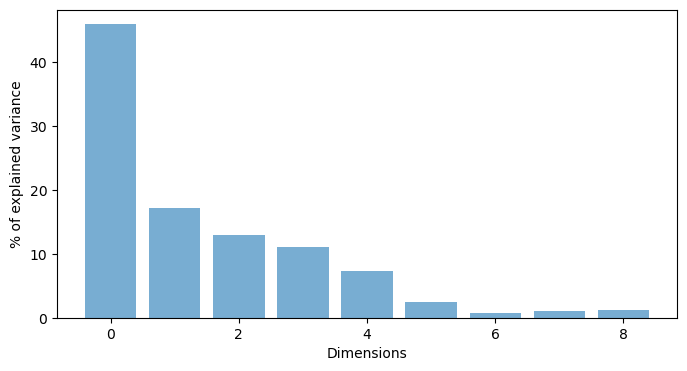

Explained Variance Dimensions: (9,)
Number of Dimensions in Data (X): 9


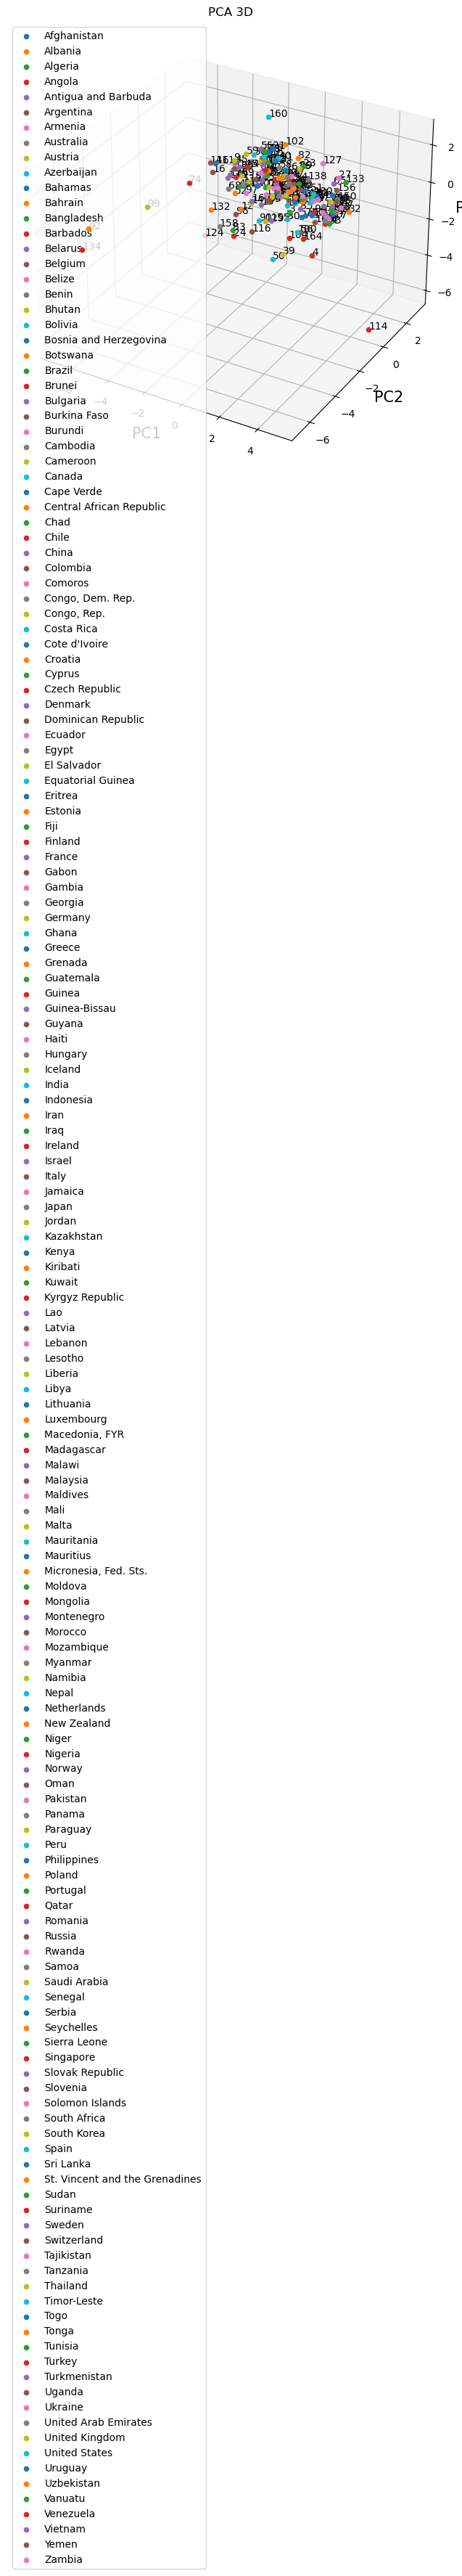

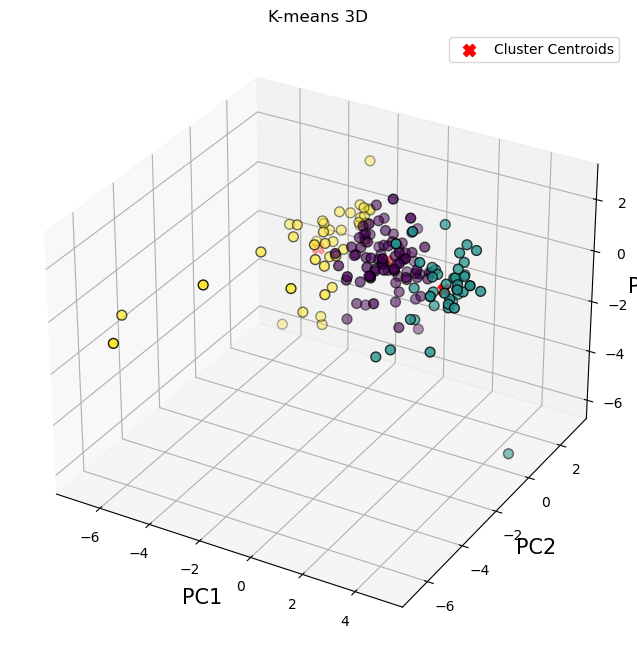

In [40]:
#trying to plot the data in 3D

import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

np.random.seed(69)

df= pd.read_csv("Country-data.csv")

country= df["country"].tolist()
X= df.drop("country", axis=1)

X = (X-X.mean()) / X.std(ddof=0)

X_corr = (1/167)* X.T.dot(X)

eig_values, eig_vectors = np.linalg.eig(X_corr)

total_eig = np.sum(eig_values)

print("sum of eigenvalues:", np.sum(eig_values))


explained_variance = (eig_values / np.sum(eig_values)) * 100

print("Explained Variance for PC1:", explained_variance[0])
print("Explained Variance for PC2:", explained_variance[1])

plt.figure(figsize=(8, 4))
plt.bar(range(X.shape[1]), explained_variance, alpha=0.6)  
plt.ylabel("% of explained variance")
plt.xlabel("Dimensions")
plt.show()

print("Explained Variance Dimensions:", explained_variance.shape)
print("Number of Dimensions in Data (X):", X.shape[1])

pc1 = X.dot(eig_vectors[:, 0])
pc2 = X.dot(eig_vectors[:, 1])
pc3 = X.dot(eig_vectors[:, 2])

X_pca = np.vstack((pc1, pc2, pc3)).T

def plot_scatter(pc1, pc2,pc3):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i, spec in enumerate(country):
        ax.scatter(pc1[i], pc2[i], pc3[i], label=spec, s=20)
        ax.text(pc1[i], pc2[i], pc3[i], str(i + 1), fontsize=10)
        
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_zlabel('PC3', fontsize=15)

    plt.title('PCA 3D')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_scatter(pc1, pc2, pc3)


def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices, :]

def assign_to_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i, :]
        centroids[i, :] = np.mean(cluster_points, axis=0)
    return centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_to_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

k = 3

labels, centroids = kmeans(X_pca, k)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', edgecolors='k', s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=75, label='Cluster Centroids')

ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_zlabel('PC3', fontsize=15)

plt.title('K-means 3D')
plt.legend()
plt.grid(True)
plt.show()

sum of eigenvalues: 9.000000000000004
Explained Variance for PC1: 45.95173978609587
Explained Variance for PC2: 17.181625651618212


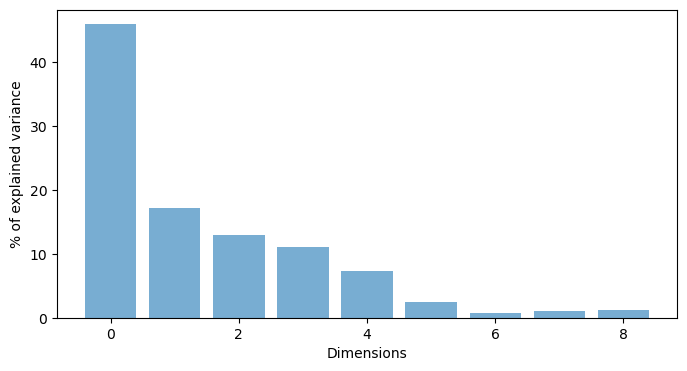

Explained Variance Dimensions: (9,)
Number of Dimensions in Data (X): 9


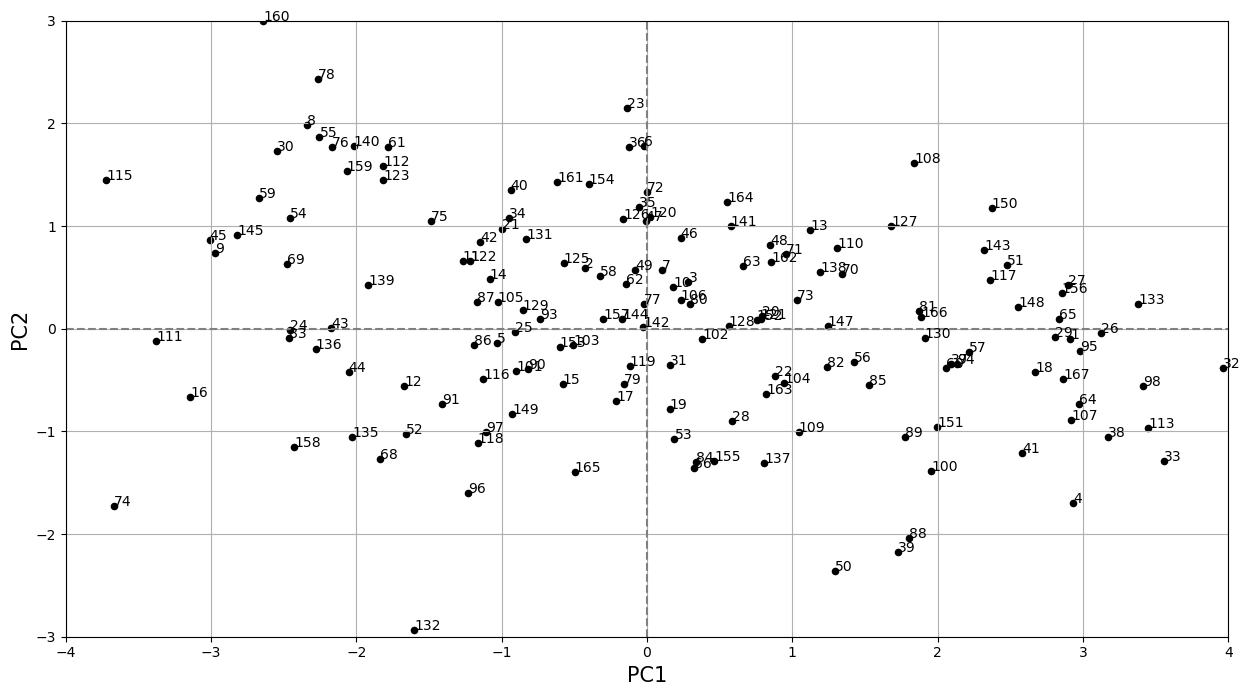

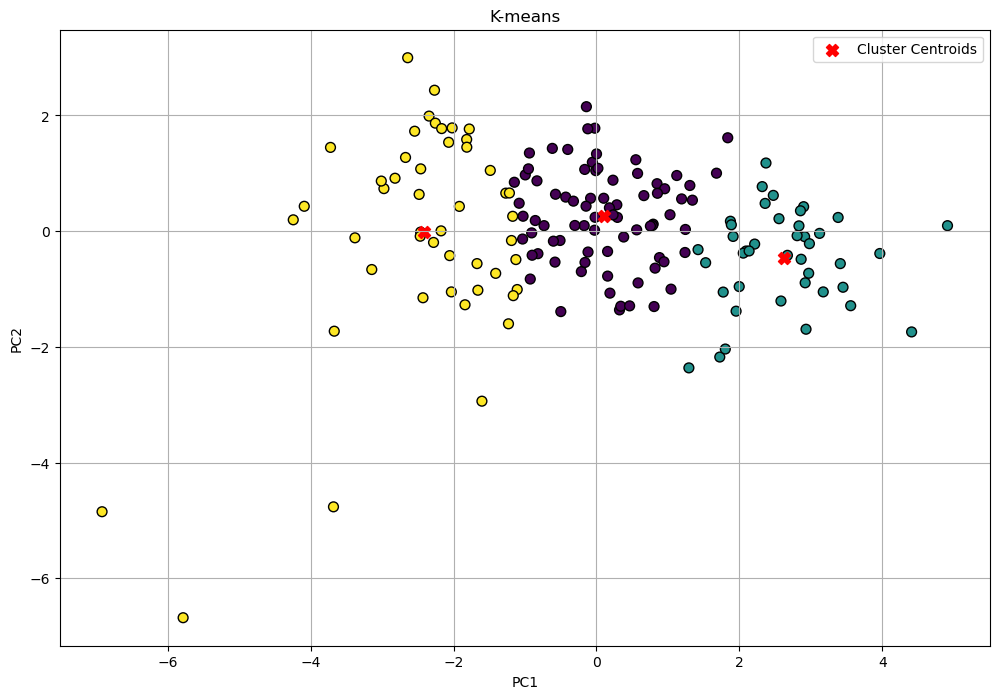

In [38]:
#initial code

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(69)

df= pd.read_csv("Country-data.csv")

country= df["country"].tolist()
X= df.drop("country", axis=1)

X = (X-X.mean()) / X.std(ddof=0)

X_corr = (1/167)* X.T.dot(X)

eig_values, eig_vectors = np.linalg.eig(X_corr)

total_eig = np.sum(eig_values)

print("sum of eigenvalues:", np.sum(eig_values))


explained_variance = (eig_values / np.sum(eig_values)) * 100

print("Explained Variance for PC1:", explained_variance[0])
print("Explained Variance for PC2:", explained_variance[1])

plt.figure(figsize=(8, 4))
plt.bar(range(X.shape[1]), explained_variance, alpha=0.6)  
plt.ylabel("% of explained variance")
plt.xlabel("Dimensions")
plt.show()

print("Explained Variance Dimensions:", explained_variance.shape)
print("Number of Dimensions in Data (X):", X.shape[1])

pc1 = X.dot(eig_vectors[:, 0])
pc2 = X.dot(eig_vectors[:, 1])

X_pca = np.vstack((pc1, pc2)).T

def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))

    for i, spec in enumerate(country):
        plt.scatter(pc1[i], pc2[i], label=spec, s=20, color="black")
        ax.annotate(str(i + 1), (pc1[i], pc2[i]))

    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()

plot_scatter(pc1, pc2)


def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices, :]

def assign_to_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i, :]
        centroids[i, :] = np.mean(cluster_points, axis=0)
    return centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_to_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

k = 3

labels, centroids = kmeans(X_pca, k)


plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=75, label='Cluster Centroids')
plt.title('K-means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()